In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
df = pd.read_csv('Height-Weight Data.csv')

In [3]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
df.tail()

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [5]:
df.shape

(3501, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3501 non-null   float64
 1   Weight  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


In [8]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


Text(0, 0.5, 'Weight')

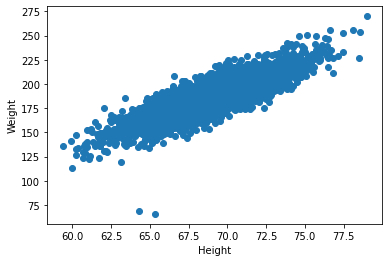

In [11]:
plt.scatter(df.Height, df.Weight)
plt.xlabel('Height')
plt.ylabel('Weight')


In [13]:
df.Height.mean()

69.02441087268797

In [14]:
df.Weight.mean()

186.89125797946284

In [15]:
x = df[['Height']]
y = df['Weight']

In [16]:
x.shape

(3501, 1)

In [17]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=.70, random_state=1)

In [18]:
xtest.shape

(1051, 1)

In [19]:
ytest.shape

(1051,)

In [21]:
xtrain.shape

(2450, 1)

In [23]:
ytrain.shape

(2450,)

In [24]:
ytrain #y for training

221     165.431242
2696    185.348211
1334    179.352182
3402    197.476930
1159    200.286509
           ...    
2763    186.208566
905     175.093255
1096    224.440459
235     198.460249
1061    192.307027
Name: Weight, Length: 2450, dtype: float64

In [25]:
xtrain #x for training

,Height
221,66.786927
2696,65.192862
1334,68.390109
3402,68.145621
1159,71.647580
...,...
2763,68.457061
905,66.539812
1096,75.999957
235,70.555244


In [27]:
from sklearn.linear_model import LinearRegression

In [29]:
lr = LinearRegression()

In [30]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [31]:
m = lr.coef_

In [32]:
c = lr.intercept_
c

-225.82603000755844

In [34]:
x1 = 73.912549
y = m*x1 + c 
y

array([215.98249622])

In [35]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [36]:
lr.predict([[73.912549]])

array([215.98249622])

In [37]:
df['Predicted Values'] = lr.predict(x)

In [39]:
df.head(20)

,Height,Weight,Predicted Values
0,73.847017,241.893563,215.590782
1,68.781904,162.310473,185.314325
2,74.110105,212.740856,217.163380
3,71.730978,220.042470,202.942268
4,69.881796,206.349801,191.888873
5,67.253016,152.212156,176.175472
6,68.785081,183.927889,185.333317
7,68.348516,167.971111,182.723767
8,67.018950,175.929440,174.776355
9,63.456494,156.399676,153.481956


In [40]:
lr.score(xtest, ytest)

0.7313258168853622

In [41]:
lr.score(xtrain , ytrain)

0.7327243206606744

In [42]:
from sklearn.metrics import mean_squared_error

In [52]:
mse= mean_squared_error(df.Weight,df['Predicted Values']) #total ... Weight is actual value
mse

106.01097113124197

In [54]:
pred = lr.predict(xtest)
pred

array([177.07092663, 189.9655512 , 167.54939263, ..., 209.55755027,
       178.6987462 , 204.84854541])

In [56]:
mse = mean_squared_error(ytest, pred) #testing error
mse

110.89221516932378

In [57]:
pred2 = lr.predict(xtrain)
pred2

array([173.38945227, 163.86100911, 182.97238866, ..., 228.45987235,
       195.91437382, 194.20551648])

In [58]:
mse = mean_squared_error(ytrain, pred2) #training error
mse

103.91701705613012